# 1-) Librerias y carga de archivos

In [1]:
# Importar las librerias necesarias
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
import statsmodels.api as sm
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as smEEe
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV

Panorama electoral Dia a Dia

In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Respuestas_campaña_alcaldía_Tuluá_ 2024 - Seguimiento_panorama_electoral - 2023-08-15T20-44-05-0300.csv to Respuestas_campaña_alcaldía_Tuluá_ 2024 - Seguimiento_panorama_electoral - 2023-08-15T20-44-05-0300.csv


Conocimiento de los candidatos

In [2]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Conocimiento_candidatos_elecciones_Tulua - Encuesta_conocimiento_candidatos - 2023-07-29T15-23-55-0300.csv to Conocimiento_candidatos_elecciones_Tulua - Encuesta_conocimiento_candidatos - 2023-07-29T15-23-55-0300.csv


Datos en tierra

In [ ]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

# 2-) Asignar los nombre de cada Dataset

In [3]:
data_Respuestas = pd.read_csv('Respuestas_campaña_alcaldía_Tuluá_ 2024 - Seguimiento_panorama_electoral - 2023-08-15T20-44-05-0300.csv')

In [4]:
data_respuestas_limpia = data_Respuestas.drop(['Registro','Duración','Dispositivo'], axis=1)

In [5]:
data_respuestas_limpia

,¿Has oído hablar del candidato Ever Antonio Villegas Morante?,¿Has oído hablar del candidato José Alexander Gallego Chávez?,¿Has oído hablar del candidato Gustavo Adolfo Vélez Román?,¿has oído hablar del candidato Llener Darío Borja?,¿Has oído hablar sobre la candidata Sandra Arrubla?,Has oído hablar del candidato Marcos Urrutia?,"En su opinión, ¿qué candidato/a tiene las mejores propuestas o soluciones para abordar los problemas actuales del país/estado/municipio?"
0,Desconocido,Muy Conocido,Conocido,Desconocido,Desconocida,NaN,Jose Alexander Gallego Chávez
1,Poco Conocido,Desconocido,Muy Conocido,Poco Conocido,Desconocida,NaN,Gustavo Adolfo Vélez Román
2,NaN,NaN,Muy Conocido,NaN,Desconocida,NaN,Gustavo Adolfo Vélez Román
3,Poco Conocido,Poco Conocido,Muy Conocido,Muy Conocido,Poco Conocida,NaN,Llener Darío Borja
4,Muy conocido,Conocido,Muy Conocido,Muy Conocido,Poco Conocida,NaN,Gustavo Adolfo Vélez Román
...,...,...,...,...,...,...,...
1648,Poco Conocido,Muy Conocido,Muy Conocido,Poco Conocido,Poco Conocida,Poco conocido,Jose Alexander Gallego Chávez
1649,Desconocido,Muy Conocido,Desconocido,Desconocido,Desconocida,Desconocido,Jose Alexander Gallego Chávez
1650,Desconocido,Desconocido,Desconocido,Desconocido,Desconocida,Poco conocido,NaN
1651,Poco Conocido,Poco Conocido,Desconocido,Desconocido,Desconocida,Muy conocido,Marcos Urrutia


In [6]:
# Si solo deseas reemplazar valores NaN en columnas específicas, puedes hacerlo así
columns_to_fill = ['¿Cuál es el principal motivo que lo lleva a votar por este candidato?', '¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?', '¿Tiene algún candidato en mente para la próxima elección a la alcaldía en su municipio?','Si la elección fuera hoy, ¿por cuál de los siguientes candidatos oficiales votaría?']
data_respuestas_limpia[columns_to_fill] = data_respuestas_limpia[columns_to_fill].fillna('No-Respuesta')

In [7]:
data_respuestas_limpia.shape

(1653, 7)

In [8]:
# Suponiendo que 'data_respuestas_limpia' es tu DataFrame
# Si aún no has cargado los datos, asegúrate de cargarlos primero.

# Crear una nueva columna 'Target' con valores 0 por defecto
data_respuestas_limpia['Target'] = 0

# Asignar 1 a las filas donde la columna 'Si la elección fuera hoy, ¿por cuál de los siguientes candidatos oficiales votaría?' sea igual a 'Gustavo Adolfo Vélez Román'
data_respuestas_limpia.loc[data_respuestas_limpia['Si la elección fuera hoy, ¿por cuál de los siguientes candidatos oficiales votaría?'] == 'Gustavo Adolfo Vélez Román', 'Target'] = 1


In [9]:
data_respuestas_limpia

,¿Has oído hablar del candidato Ever Antonio Villegas Morante?,¿Has oído hablar del candidato José Alexander Gallego Chávez?,¿Has oído hablar del candidato Gustavo Adolfo Vélez Román?,¿has oído hablar del candidato Llener Darío Borja?,¿Has oído hablar sobre la candidata Sandra Arrubla?,Has oído hablar del candidato Marcos Urrutia?,"En su opinión, ¿qué candidato/a tiene las mejores propuestas o soluciones para abordar los problemas actuales del país/estado/municipio?",Target
0,Desconocido,Muy Conocido,Conocido,Desconocido,Desconocida,NaN,Jose Alexander Gallego Chávez,0
1,Poco Conocido,Desconocido,Muy Conocido,Poco Conocido,Desconocida,NaN,Gustavo Adolfo Vélez Román,1
2,No-Respuesta,No-Respuesta,Muy Conocido,NaN,Desconocida,NaN,Gustavo Adolfo Vélez Román,1
3,Poco Conocido,Poco Conocido,Muy Conocido,Muy Conocido,Poco Conocida,NaN,Llener Darío Borja,0
4,Muy conocido,Conocido,Muy Conocido,Muy Conocido,Poco Conocida,NaN,Gustavo Adolfo Vélez Román,1
...,...,...,...,...,...,...,...,...
1648,Poco Conocido,Muy Conocido,Muy Conocido,Poco Conocido,Poco Conocida,Poco conocido,Jose Alexander Gallego Chávez,0
1649,Desconocido,Muy Conocido,Desconocido,Desconocido,Desconocida,Desconocido,Jose Alexander Gallego Chávez,0
1650,Desconocido,Desconocido,Desconocido,Desconocido,Desconocida,Poco conocido,No-Respuesta,0
1651,Poco Conocido,Poco Conocido,Desconocido,Desconocido,Desconocida,Muy conocido,Marcos Urrutia,0


# 3-) Modelo predictivo utilizando arboles de decision

In [17]:
data_respuestas_limpia_Defi = data_respuestas_limpia.drop(['Si la elección fuera hoy, ¿por cuál de los siguientes candidatos oficiales votaría?'], axis=1)

In [18]:
data_respuestas_limpia_Defi = pd.get_dummies(data_respuestas_limpia_Defi, columns=['¿Tiene algún candidato en mente para la próxima elección a la alcaldía en su municipio?', '¿Cuál es el principal motivo que lo lleva a votar por este candidato?', '¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?'])

In [19]:
X2 = data_respuestas_limpia_Defi.drop('Target', axis=1)
y2 = data_respuestas_limpia_Defi['Target']

In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [21]:
clf2 = DecisionTreeClassifier(random_state=1, max_depth=3) # Limitamos la profundidad

In [22]:
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [23]:
y2_pred = clf2.predict(X2_test)

In [24]:
pd.crosstab(y2_test, y2_pred)

col_0,0,1
Target,,
0,302,32
1,37,125


In [25]:
accuracy = metrics.accuracy_score(y2_test, y2_pred)
exactitud = metrics.precision_score(y2_test, y2_pred, average = 'weighted')

print(f'Precision del modelo:  {accuracy * 100:.1f}%')
print(f'Exactitud del modelo:  {exactitud * 100:.1f}%')

Precision del modelo:  86.1%
Exactitud del modelo:  86.0%


In [26]:
# Obtener la importancia de las características
feature_importances = clf2.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
df_importance = pd.DataFrame({
    'Feature': X2_train.columns,
    'Importance': feature_importances
})
# Ordenar el DataFrame por importancia
df_importance = df_importance.reset_index(drop=True)

df_importance = df_importance.sort_values('Importance', ascending=False)

# Mostrar la importancia de las características
df_importance

,Feature,Importance
17,¿Has oído hablar del candidato Gustavo Adolfo ...,0.818079
7,¿Has oído hablar del candidato Ever Antonio Vi...,0.117402
2,¿Has oído hablar del candidato José Alexander ...,0.059780
10,¿Has oído hablar sobre la candidata Sandra Arr...,0.004009
8,¿Has oído hablar del candidato Ever Antonio Vi...,0.000731
12,¿Has oído hablar sobre la candidata Sandra Arr...,0.000000
18,¿Has oído hablar del candidato Gustavo Adolfo ...,0.000000
16,¿Has oído hablar del candidato Gustavo Adolfo ...,0.000000
15,¿Has oído hablar del candidato Gustavo Adolfo ...,0.000000
14,¿Has oído hablar sobre la candidata Sandra Arr...,0.000000


In [28]:
# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

# Ajustar el modelo
grid_search.fit(X2_train, y2_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Utilizar el mejor modelo para hacer predicciones
best_clf = grid_search.best_estimator_
y2_pred = best_clf.predict(X2_test)

# Calcular la precisión
accuracy = metrics.accuracy_score(y2_test, y2_pred)
print(f"Precisión del modelo con los mejores hiperparámetros: {accuracy * 100:.2f}%")

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Precisión del modelo con los mejores hiperparámetros: 83.67%


In [29]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    splitter='random',
    random_state=0
)
clf.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0, splitter='random')

In [30]:
y2_pred = clf.predict(X2_test)

In [31]:
accuracy = metrics.accuracy_score(y2_test, y2_pred)
precision = metrics.precision_score(y2_test, y2_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 83.67%
Precisión del modelo: 83.95%


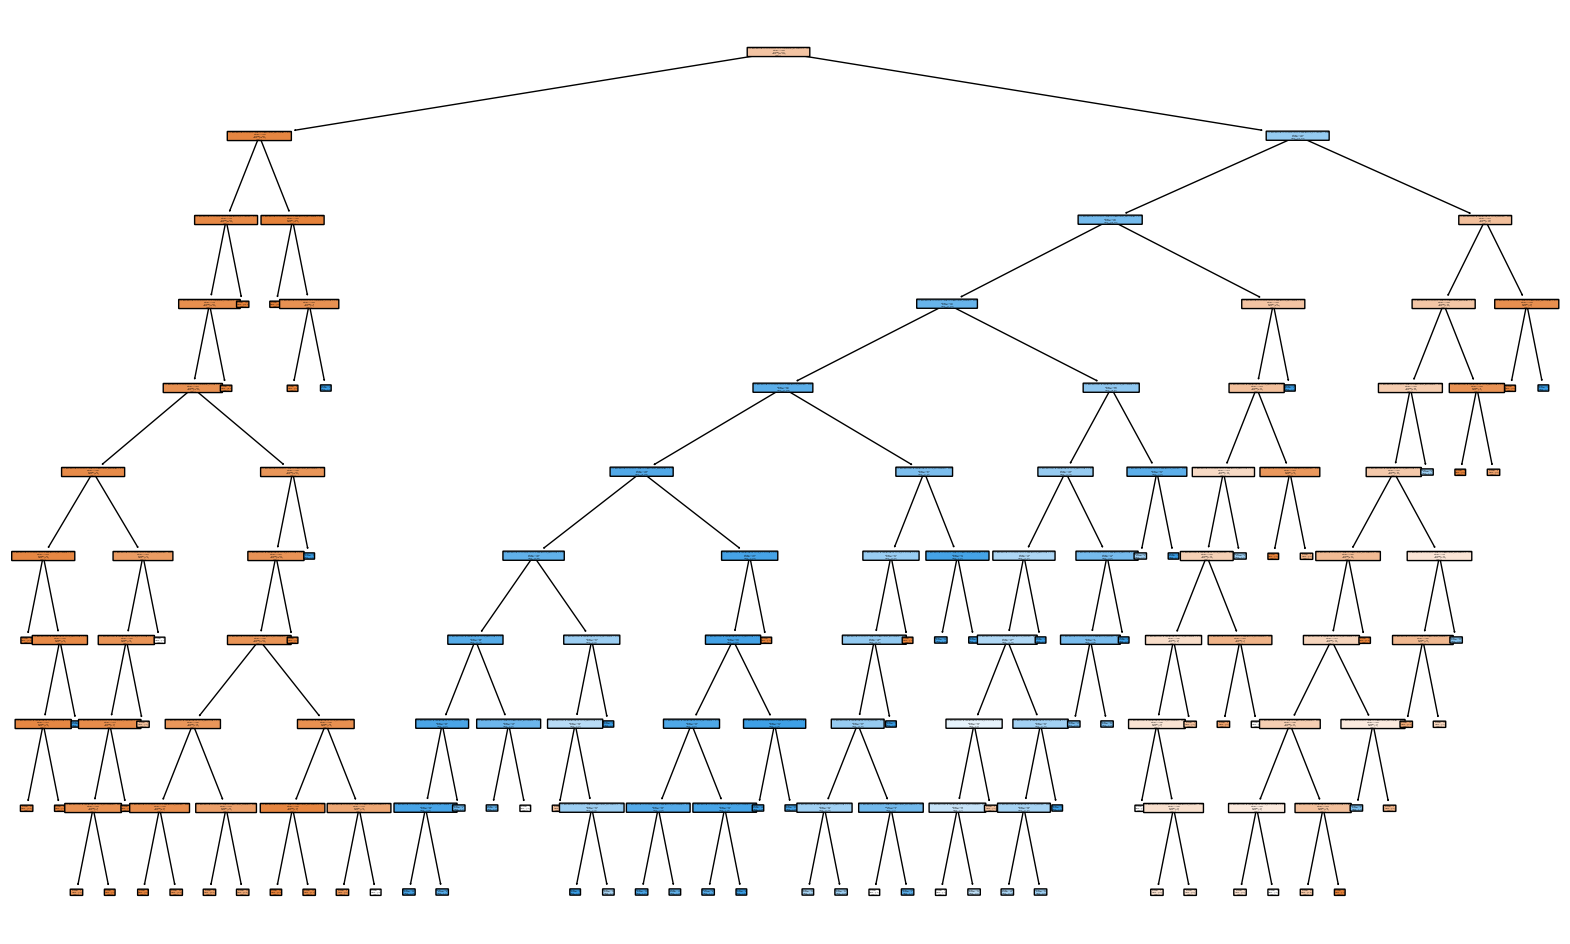

In [32]:
# Crear la visualización del árbol
plt.figure(figsize=(20, 12))  # Cambia el tamaño de la figura según las preferencias
tree.plot_tree(clf, filled=True, feature_names=X2.columns, class_names=str(clf.classes_), rounded= True)
plt.show()

In [33]:
feature_importances = clf.feature_importances_
feature_names=X2.columns

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
df_importance_mejorado = df_importance.sort_values('Importance', ascending=False)

# Mostrar la importancia de las características
df_importance_mejorado

,Feature,Importance
17,¿Has oído hablar del candidato Gustavo Adolfo ...,0.648707
7,¿Has oído hablar del candidato Ever Antonio Vi...,0.100418
2,¿Has oído hablar del candidato José Alexander ...,0.067596
11,¿Has oído hablar sobre la candidata Sandra Arr...,0.023017
4,¿Has oído hablar del candidato José Alexander ...,0.021869
5,¿Has oído hablar del candidato Ever Antonio Vi...,0.019280
0,¿Has oído hablar del candidato José Alexander ...,0.014900
12,¿Has oído hablar sobre la candidata Sandra Arr...,0.013512
1,¿Has oído hablar del candidato José Alexander ...,0.013183
3,¿Has oído hablar del candidato José Alexander ...,0.012851


In [34]:
pd.crosstab(y2_test, y2_pred)

col_0,0,1
Target,,
0,289,45
1,36,126


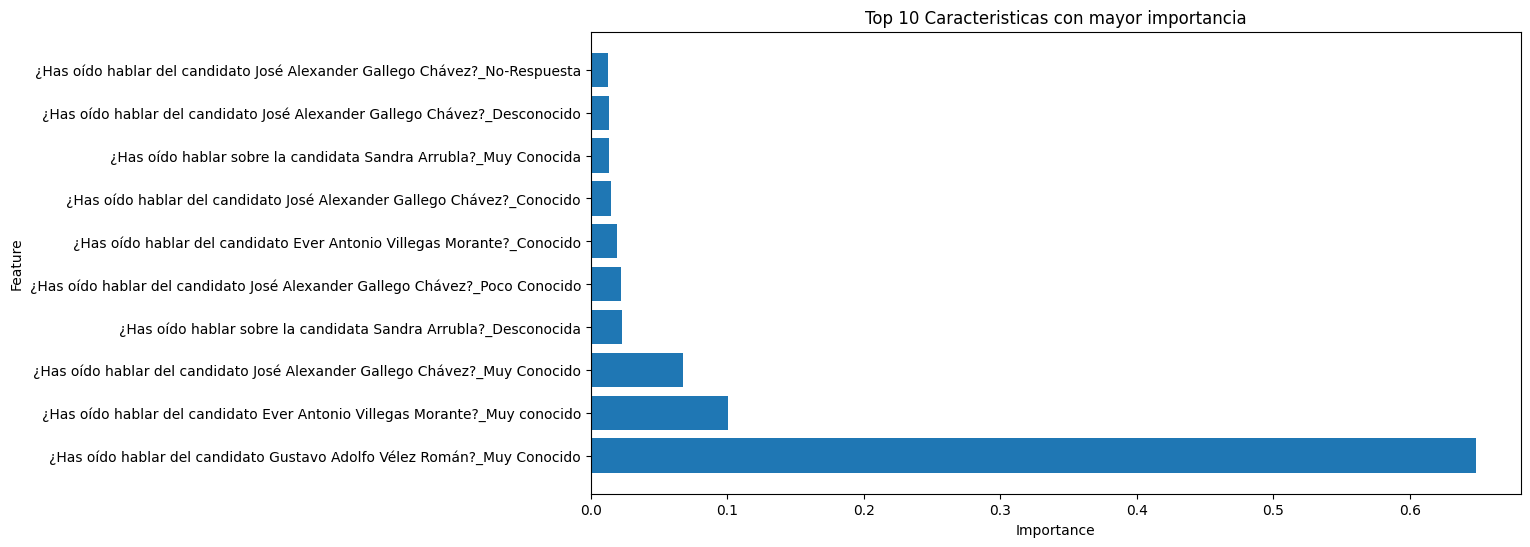

In [35]:
# Filtrar las características con una importancia mayor que 0.1
df_filtered = df_importance_mejorado[df_importance_mejorado['Importance'] > 0]

# Tomar solo los primeros 10 valores
df_filtered_top10 = df_filtered.head(10)

# Graficar la importancia de las 10 características principales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(df_filtered_top10['Feature'], df_filtered_top10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Caracteristicas con mayor importancia')
plt.show()


Tecnicas de balanceo (Oversamplig)

Correlativa

# 4-) Modelo utilizando random forest

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

In [ ]:
data_respuestas_limpia_Defi = data_respuestas_limpia.drop(['Si la elección fuera hoy, ¿por cuál de los siguientes candidatos oficiales votaría?'], axis=1)

In [ ]:
data_respuestas_limpia_Defi = pd.get_dummies(data_respuestas_limpia_Defi, columns=['¿Tiene algún candidato en mente para la próxima elección a la alcaldía en su municipio?', '¿Cuál es el principal motivo que lo lleva a votar por este candidato?', '¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?'])

In [ ]:
X = data_respuestas_limpia_Defi.drop('Target', axis=1)
y = data_respuestas_limpia_Defi['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
pred = pd.crosstab(y_test, y_pred)
pred

col_0,0,1
Target,,
0,638,44
1,103,409


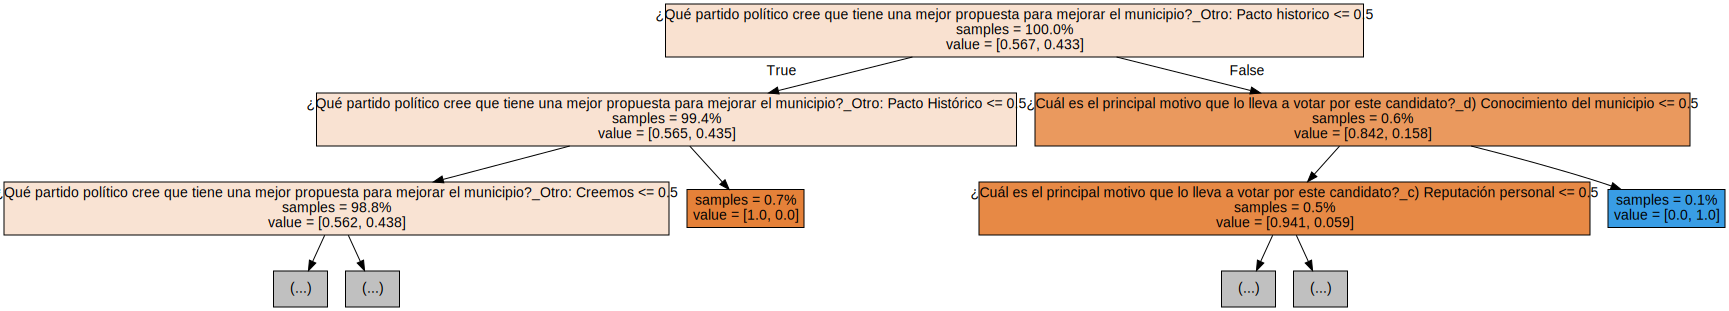

In [ ]:
for i in range(1):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X2_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3d344a1b70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3d344ad4e0>})

In [ ]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 486}


In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X2_train.columns).sort_values(ascending=False)
feature_importances

¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?_Partido conservador            0.424037
¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?_Partido de la U                0.112412
¿Cuál es el principal motivo que lo lleva a votar por este candidato?_d) Conocimiento del municipio                0.106867
¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?_Cambio radical                 0.103565
¿Cuál es el principal motivo que lo lleva a votar por este candidato?_b) Propuestas de campaña                     0.061105
                                                                                                                     ...   
¿Cuál es el principal motivo que lo lleva a votar por este candidato?_Gratitud                                     0.000000
¿Qué partido político cree que tiene una mejor propuesta para mejorar el municipio?_Otro: Dignidad y comoromiso    0.000000
¿Qué par

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')

print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Precisión del modelo: {precision * 100:.2f}%')

Exactitud del modelo: 87.69%
Precisión del modelo: 87.90%


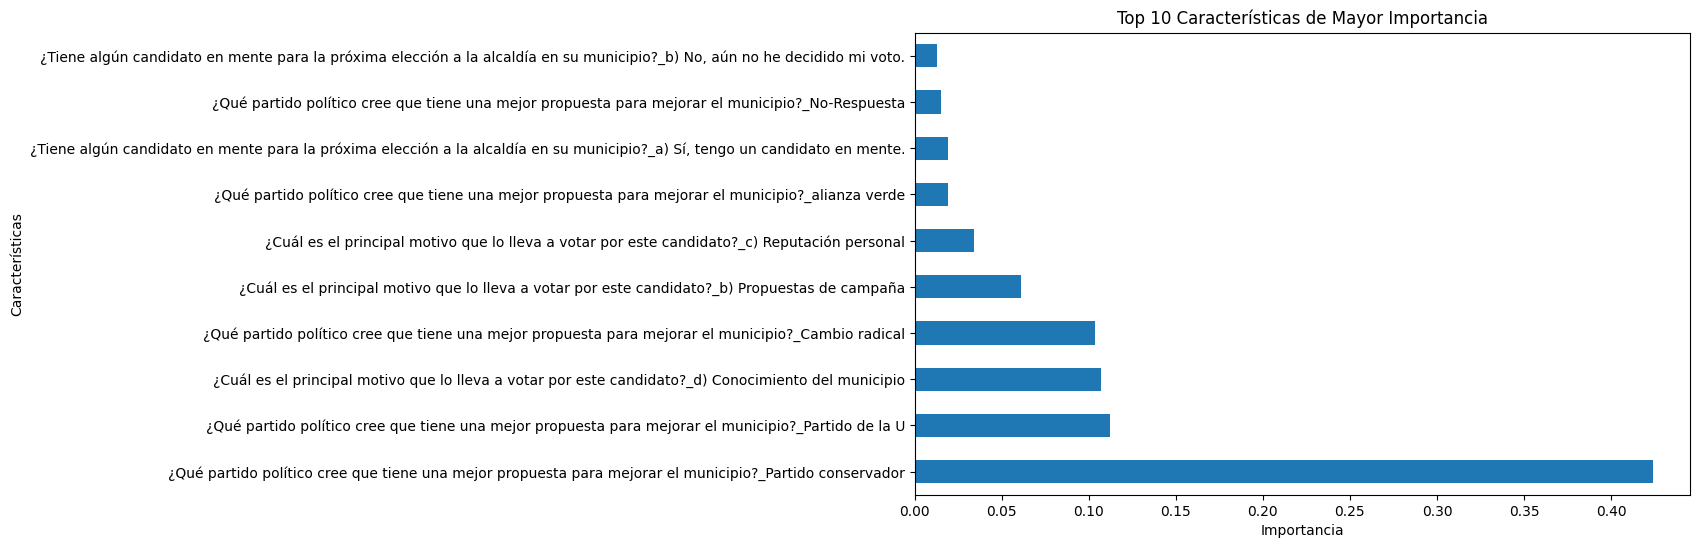

In [ ]:
# Supongamos que feature_importances es una Serie de pandas
# ya ordenada de mayor a menor importancia
feature_importances = feature_importances.head(10)

# Crea el gráfico de barras horizontal con las 10 características principales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
feature_importances.plot(kind='barh')  # Usa 'barh' para barras horizontales
plt.ylabel("Características")
plt.xlabel("Importancia")
plt.title("Top 10 Características de Mayor Importancia")
plt.show()

# 5-) Grafica final de favorabilidad general sobre el candidato GAVR

<Axes: title={'center': 'Favorabilidad general del candidato Gustavo Adolfo Velez Roman'}, ylabel='Modelado'>

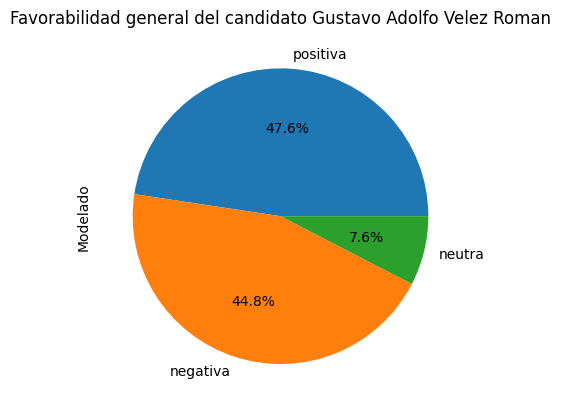

In [ ]:
Modelado_defi.value_counts().plot(kind='pie',autopct='%.1f%%', title='Favorabilidad general del candidato Gustavo Adolfo Velez Roman')